## Data Loading

In [3]:
import os
import sys
from dotenv import load_dotenv

project_root_path = r"C:\Users\boluy\Downloads\TERM 03\AML 3303\projects\Staywise-Airbnb-Pricing" 
dotenv_path = os.path.join(project_root_path, '.env')

if project_root_path and project_root_path not in sys.path:
    sys.path.insert(0, project_root_path)
    print(f" Path Fix: Project Root added to sys.path: {project_root_path}")
else:
    print(" Path Fix: Project Root already set.")


# 2. LOAD ENVIRONMENT VARIABLES & FORCING S3 PATH, to ensures the correct S3_PATH is always used

if os.path.exists(dotenv_path):
    load_dotenv(dotenv_path)
    os.environ["S3_PATH"] = "s3://my-airbnb-pricing/AB_NYC_2019.csv"
    print(" Environment: S3_PATH forced to correct value.")
else:
    print(f" Environment ERROR: Cannot find .env file at {dotenv_path}.")


# --- 3. Import Modules 
import src.data as data
import src.process as process # Using 'process' as agreed upon

import pandas as pd
from sklearn.model_selection import train_test_split
import joblib

print("\n All imports successful! Ready for data loading.")



 Path Fix: Project Root already set.
 Environment: S3_PATH forced to correct value.

 All imports successful! Ready for data loading.


In [3]:
# Get the absolute path of the directory that contains the 'src' folder
project_root = os.path.abspath(os.path.join(os.getcwd()))

# Add the project root path to the Python system path
if project_root not in sys.path:
    sys.path.append(project_root)



In [6]:
# Get the directory of the current notebook/script
current_dir = os.getcwd()

# Assuming 'src' is one level below the directory where the notebook is running:
# Find the project root (the directory containing the 'src' folder)
project_root = os.path.abspath(current_dir)

# Add the project root to the system path
if project_root not in sys.path:
    sys.path.append(project_root)
    
print(f"Successfully added {project_root} to sys.path.")

Successfully added C:\Users\boluy\Downloads\TERM 03\AML 3303\Assignment02-airbnb-pricing to sys.path.


In [4]:
# Import and Test Data Loading
#
try:
    from src.data import load_from_s3
    
    # Load data from S3
    df = load_from_s3()

    print("\n Data Loading SUCCESS!")
    print(f"Loaded {len(df)} rows from S3.")
   
except Exception as e:
    print(f"\n ERROR during data loading: {e}")


 Data Loading SUCCESS!
Loaded 48895 rows from S3.


In [5]:
print("\nDataFrame Head:")
df.head()


DataFrame Head:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### importing libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Univariate Analysis
Price histogram Plots

<Axes: xlabel='price', ylabel='Count'>

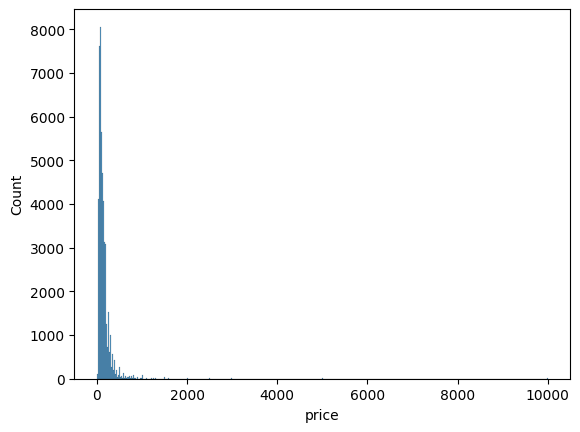

In [21]:
sns.histplot(df['price'])

### Observation
 The price distribution is highly skewed to the left (right-tailed), with the vast majority of listings clustered in the $0 to $200 range.

Key Takeaway: The market is dominated by budget and mid-range listings. The listings with prices over $500 are rare and will be treated as outliers in a predictive model, potentially requiring removal or advanced transformation (like log-transforming the price).

<Axes: xlabel='price', ylabel='Count'>

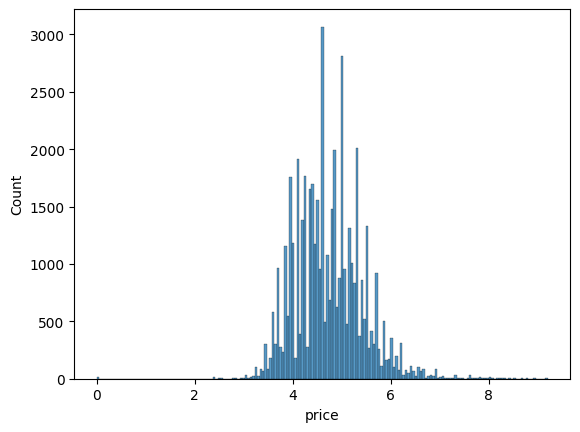

In [22]:
sns.histplot(np.log1p(df['price']))

### Observation
Log-Transformed Price Distribution (Histogram)Finding: After applying the log transformation ($\text{log}(1 + \text{price})$), the price distribution has become much more symmetrical and approximately normal (bell-shaped), centering around a value of about 5.

Key Takeaway: The log transformation has successfully tamed the severe skewness and outliers seen in the raw price data. Using $\text{log}(\text{price})$ as the target variable for the regression model is highly recommended, as linear models perform better when the target is normally distributed.

### 1. Price vs. Room Type (Categorical Comparison)
The room_type is a key categorical feature for predicting price. A Box Plot is the best way to visualize the price distribution across these distinct categories.

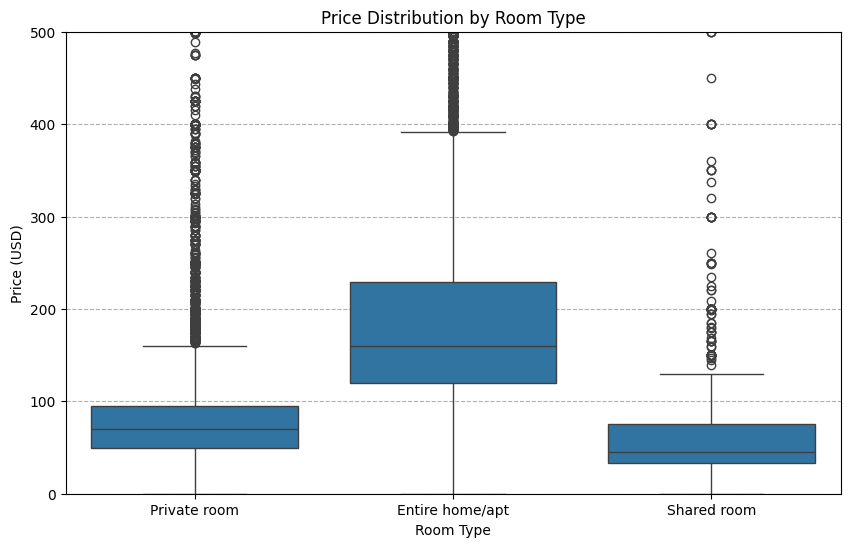

In [23]:
# Create a Box Plot to show the distribution of prices for each room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.ylim(0, 500) # Limiting y-axis to focus on the main distribution, ignoring extreme outliers
plt.grid(axis='y', linestyle='--')
plt.show()

### Observation: Price Distribution by Room Type
Entire homes/apartments are the clear premium option, with the highest median price (around $170) and the widest range of prices among the three categories.

Private rooms and Shared rooms have similar, much lower median prices (both under $80), making them the budget-friendly core of the market.

Price stability is highest for Shared rooms, which have the tightest IQR (the box) and very few high-priced outliers.

The overall pricing structure confirms that privacy and dedicated space (Entire home/apt) are the most significant drivers of price, separate from location.

Note: I used plt.ylim(0, 500) because Airbnb price data often has extreme outliers (>$1000) that can compress the rest of the plot.

### 2. Price vs. Neighbourhood (Geographical Distribution)
Since there are many neighbourhoods, it's often better to look at the Top 10 most expensive or use a Swarm Plot on the broader neighbourhood_group (like Manhattan, Brooklyn, etc.).

Option A: Price vs. Neighbourhood Group (Box Plot)

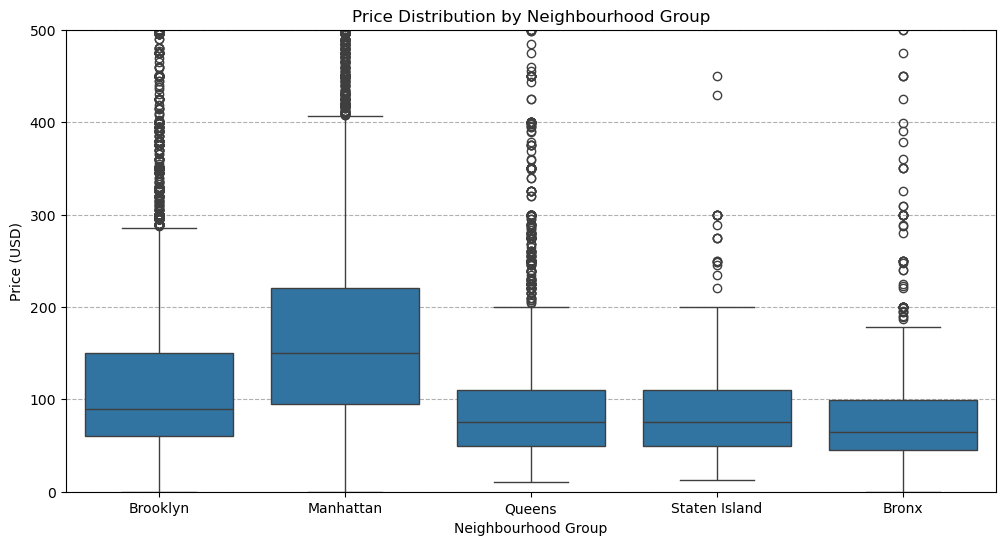

In [54]:
# Box Plot for Neighbourhood Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price (USD)')
plt.ylim(0, 500)
plt.grid(axis='y', linestyle='--')
plt.show()

### Observation: Price Distribution by Neighbourhood Group
Manhattan is the Premier Market: Manhattan listings command the highest median price (around $150) and show the largest potential for high-end earnings, evidenced by the tallest box and the greatest number of extreme outliers (high-priced listings).

Brooklyn is Second: Brooklyn is the second most expensive group, but its median price (around $90) is significantly lower than Manhattan's, marking it as the strongest mid-range market.

The Outer Boroughs are Budget-Focused: Queens, Staten Island, and the Bronx all share similar, lower median prices (around $70 or less), indicating they are predominantly the budget-friendly segments of the Airbnb market.

Key Takeaway: For model prediction, the Neighbourhood Group is a high-priority categorical feature, as it directly correlates with the price level. The difference between Manhattan and the other boroughs is much more pronounced than the differences between the outer boroughs themselves.

### Option B: Price Map (Scatter Plot on Latitude/Longitude)
A scatter plot colored by price visually shows where the expensive listings are located.

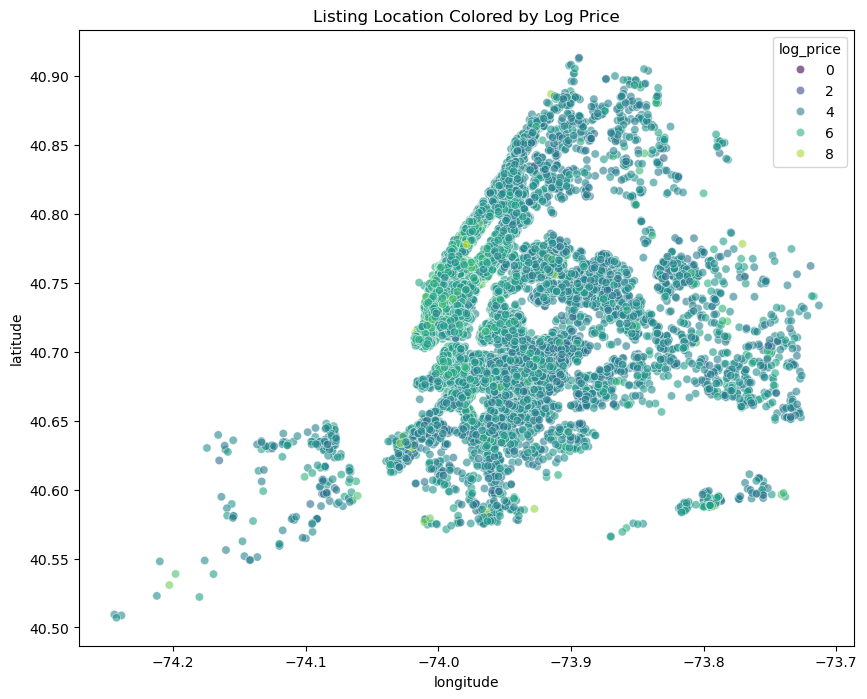

In [57]:
# Scatter Plot colored by Price (Geographical Hotspots)
plt.figure(figsize=(10, 8))
# Use log-transformed price for better color distinction
df['log_price'] = np.log1p(df['price']) 
sns.scatterplot(x='longitude', y='latitude', hue='log_price', 
                data=df.sample(frac=0.5, random_state=42), # Sample 50% for speed
                palette='viridis', alpha=0.6)
plt.title('Listing Location Colored by Log Price')
plt.show()

### Observation: Listing Location Colored by Log Price (Geographical Hotspots)
Central Price Concentration: The most expensive listings (represented by the lighter green/yellow dots, corresponding to higher log_price values) are overwhelmingly concentrated in Manhattan.

Key Hotspots: Within Manhattan, the highest-priced clusters appear in the Midtown and Downtown areas.

Brooklyn Dispersion: Brooklyn (the large landmass to the south/east of Manhattan) shows a mix of mid-range prices, with slightly higher prices concentrated near its border with Manhattan (e.g., Williamsburg/DUMBO areas).

Pricing Gradient: There is a clear price gradient—as you move away from the central business and tourist hub of Manhattan, the price generally drops, confirming that proximity to the city center and transit links strongly influences price.

Key Takeaway: The model must use latitude and longitude (or derived features like distance to key landmarks) as powerful predictors, as location dictates price far more than secondary listing attributes.

### 3. Price vs. Reviews Per Month (Correlation)
The reviews_per_month column is a continuous numeric variable, making a Scatter Plot ideal for correlation analysis. You'll need to handle the NaN values (where listings have no reviews) before plotting.


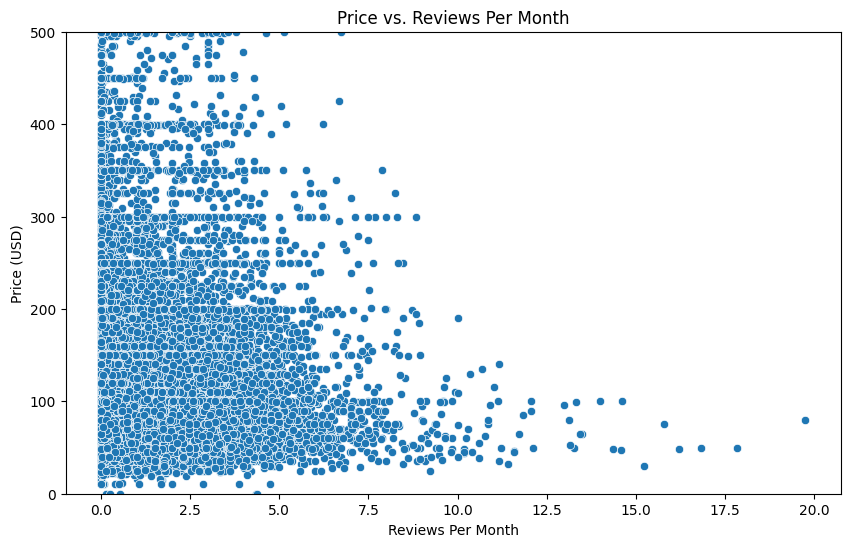

In [24]:
# Fill NaN reviews_per_month with 0 for listings with no reviews
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Create a Scatter Plot to check correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reviews_per_month', y='price', data=df.sample(frac=0.5, random_state=42)) 
plt.title('Price vs. Reviews Per Month')
plt.xlabel('Reviews Per Month')
plt.ylabel('Price (USD)')
plt.ylim(0, 500)
plt.show()

### Observation: Price vs. Reviews Per Month
Weak Negative Correlation: There is a weak, non-linear negative relationship between price and review frequency. The listings with the highest volume of reviews (over 5 per month) are generally concentrated in the low-to-mid price range (under $150).

High-Price Listings are Quieter: Listings priced highly (over $300) generally have a lower frequency of reviews (usually under 5 per month).

Market Interpretation: The data suggests that listings with very high review frequency are often highly popular, high-turnover, and competitively priced (budget-friendly) listings, rather than luxury accommodations.

Key Takeaway: Reviews Per Month should be used cautiously in the model. It is not a driver of high price but rather an indicator of popularity and affordability.

### Show missing value heatmap

In [17]:
df.isnull().mean().sort_values(ascending=False).head(20)

last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
id                                0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [ ]:
00_data_loading.ipynb — verify the cells that load from S3 and EDA are present. Move any EDA cells here if needed.

01_preprocessing.ipynb — confirm data cleaning, feature engineering, and preprocessor build/save cells are present.

02_modeling.ipynb — confirm model training, MLflow logging, model saving/registration are here.

03_explainability.ipynb — confirm SHAP, residuals, and artifacts saving are here.